### Import benchmark functions

In [1]:
from benchmark.benchmarkFunctions import *
#from algorithms import * 
from alg.BayesianOptimization import bayesian_optimization, history_wrapper
from alg.LatinHypercubeSampling import latin_hypercube
from alg.ParticleSwarmOptimization import particle_swarm
from alg.SobolSampling import sobol
from alg.ResponseSurfaceModeling import response_surface
import matplotlib.pyplot as plt
from matplotlib import cm


# Definition of variables
benchmarkfunction_list = [StybliskiTang, Rastrigin, Rosenbrock, Beale, Sphere, Perm, GoldsteinPrice, Ackley, Bohachevsky] #Hartmann
algorithms_list        = [particle_swarm, bayesian_optimization]

### Benchmark functions

In [ ]:
# Define the X and Y span
X = np.mgrid[-5:5.1:0.25, -5:5.1:0.25].reshape(2,-1)

# Initialize the figure
fig = plt.figure(figsize=[20,20])

# Compute the functions and plot the obtained surfaces
i = 1
for fun in benchmarkfunction_list:
    ax = fig.add_subplot(3,3, i, projection='3d')
    Z = np.array(fun(X))

    surf = ax.plot_trisurf(X[0], X[1], Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

    i += 1    
plt.show()


### Bayesian Optimization algorithm

[MIN function] Minimum in x=-3.0, y=-3.0 with f=-156.0
[OPTIMIZATION] Minimum in x=-2.9067385544182756, y=-2.9131966106486633 with f=-156.66106794835775
{'target': 156.66106794835775, 'params': {'X': -2.9067385544182756, 'Y': -2.9131966106486633}}


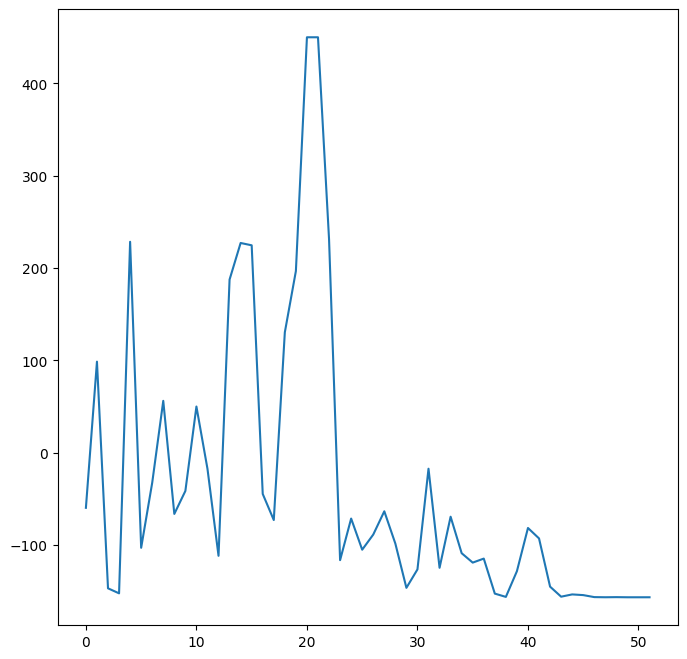

In [9]:
# Define the X and Y span
X = np.mgrid[-5:5.1:0.25, -5:5.1:0.25].reshape(2,-1)


# Compute the function
r = StybliskiTang(X)

# Find minimum and its coordinates
idx  = np.argmin(r)
Xmin = X[:,idx]

# Set the bounds
bounds = {'X' : (-5,5), 'Y' : (-5,5)}
# Run the optimization algorithm
result, hsr = bayesian_optimization(StybliskiTang, bounds, 50, 2)

print(f"[MIN function] Minimum in x={Xmin[0]}, y={Xmin[1]} with f={r[idx]}")
print(f"[OPTIMIZATION] Minimum in x={result['params']['X']}, y={result['params']['Y']} with f={StybliskiTang([result['params']['X'],result['params']['Y']])}")


hsr =  history_wrapper(hsr)
# Show the performance curve
t = np.arange(0,len(hsr))
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, hsr)

plt.show()

### Particle Swarm Optimization (PSO) algorithm

[MIN function] Minimum in x=-3.0, y=-3.0 with f=-156.0
[OPTIMIZATION] Minimum in x=-2.9035340344080387, y=-2.9035340239792853 with f=-156.6646628150857


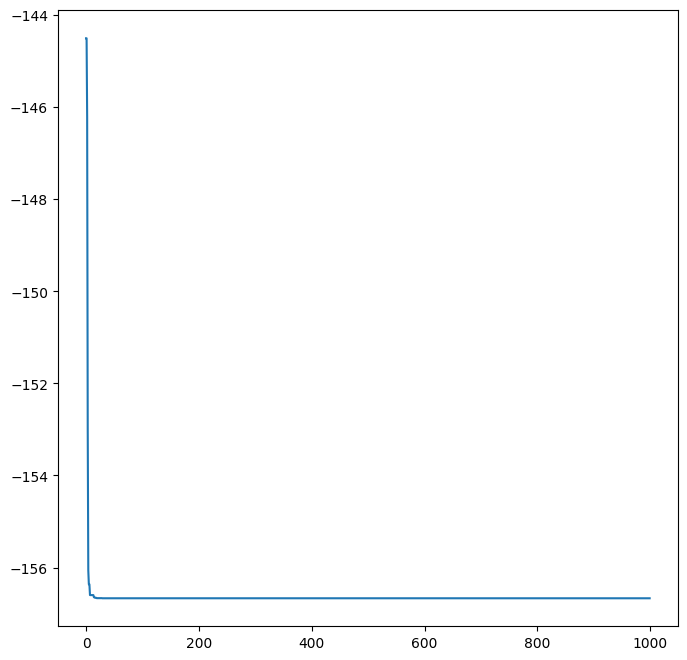

In [7]:
# Define the X and Y span
X = np.mgrid[-5:5.1:0.25, -5:5.1:0.25].reshape(2,-1)

# Compute the function
r = StybliskiTang(X)

# Find minimum and its coordinates
idx  = np.argmin(r)
Xmin = X[:,idx]

# Run the optimization algorithm
result, hsr = particle_swarm(StybliskiTang, low=-5, high=5)

print(f"[MIN function] Minimum in x={Xmin[0]}, y={Xmin[1]} with f={r[idx]}")
print(f"[OPTIMIZATION] Minimum in x={result[0]}, y={result[1]} with f={StybliskiTang(result)}")

# Show the performance curve
t = np.arange(0,len(hsr))
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, hsr)

plt.show()


### Nelder Mead algorithm

In [ ]:
# Define the X and Y span
X = np.mgrid[-5:5.1:0.25, -5:5.1:0.25].reshape(2,-1)

# Compute the function
r = StybliskiTang(X)

# Find minimum and its coordinates
idx  = np.argmin(r)
Xmin = X[:,idx]

# Run the optimization algorithm
result, hsr = nelder_mead(StybliskiTang, low=-5, high=5,max_iter=2000)

print(f"[MIN function] Minimum in x={Xmin[0]}, y={Xmin[1]} with f={r[idx]}")
print(f"[OPTIMIZATION] Minimum in x={result[0]}, y={result[1]} with f={StybliskiTang(result)}")

# Show the performance curve
t = np.arange(0,len(hsr))
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, hsr)

plt.show()

### Response Surface Modeling 

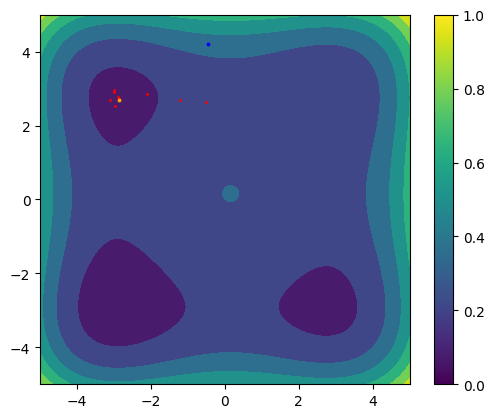

In [12]:
x0 = np.random.uniform(-5,5,size=[1,2])[0]
X, Y = response_surface(StybliskiTang, X_new=x0, iterations=100)

# Define the X and Y span
x = np.linspace(-5, 5, 101)
y = np.linspace(-5, 5, 101)
# full coordinate arrays
xx, yy = np.meshgrid(x, y)

# Compute the function
r = StybliskiTang([xx,yy])

h = plt.contourf(xx, yy, r)
plt.axis('scaled')
plt.scatter(X[:,0], X[:,1], c="red", s=1)
plt.scatter(X[0,0],X[0,1],c="blue",s=3)
plt.scatter(X[-1,0],X[-1,1],c="orange",s=3)
plt.colorbar()
plt.show()

### Sobol Sampling

c:\Users\poselin\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_qmc.py:763: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


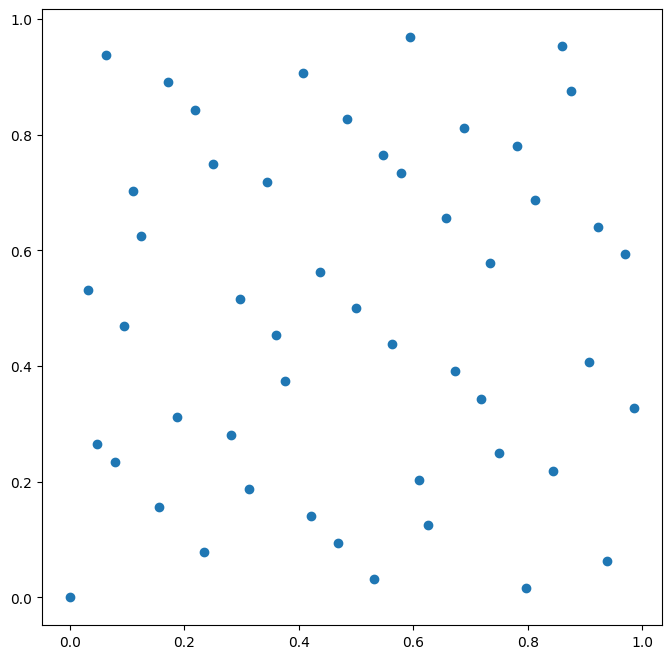

In [9]:
samples = sobol(50, 2, [-5, -5], [5, 5])

samples = np.array(samples)

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(samples[:,0], samples[:,1])


### Latin Hypercube Sampling

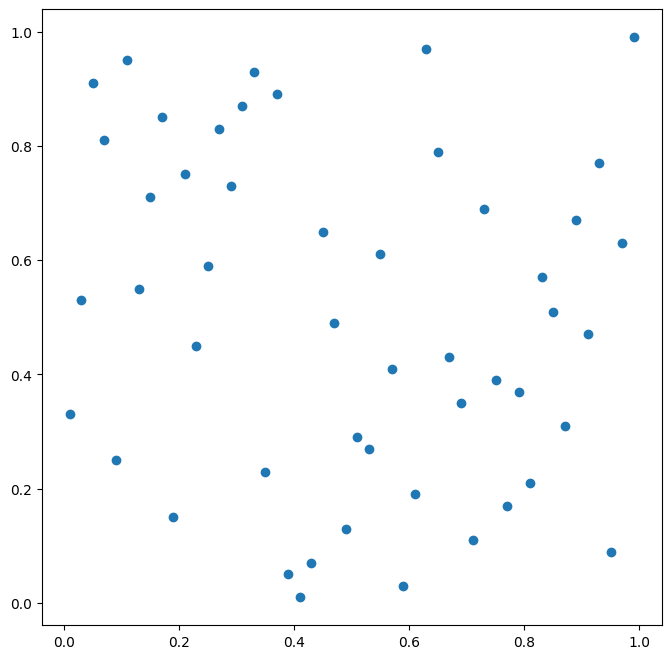

In [10]:
samples = latin_hypercube(50, 2, [-5, -5], [5, 5])

samples = np.array(samples)

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(samples[:,0], samples[:,1])


### Comparison of sampling distribution

c:\Users\poselin\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_qmc.py:763: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


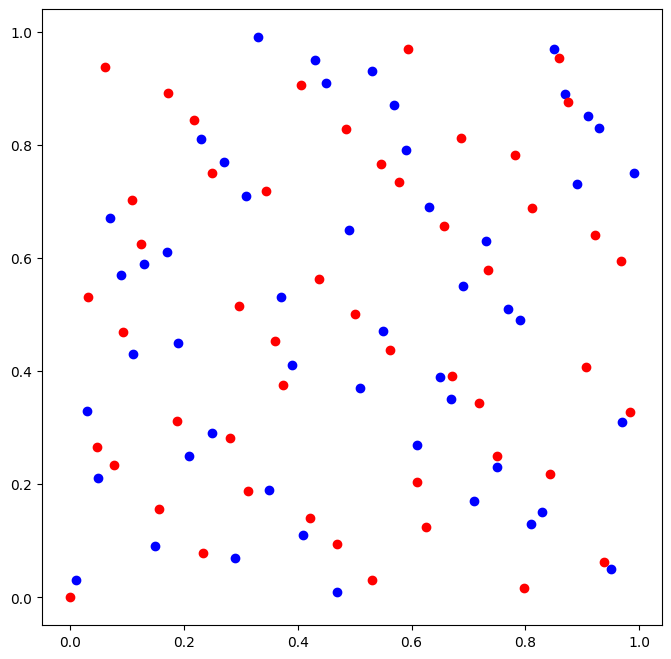

In [11]:
samples_lh = latin_hypercube(50, 2, [-5, -5], [5, 5])
samples_sobol = sobol(50, 2, [-5, -5], [5, 5])

samples_lh = np.array(samples_lh)
samples_sobol = np.array(samples_sobol)

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(samples_lh[:,0], samples_lh[:,1],c="blue")
ax.scatter(samples_sobol[:,0], samples_sobol[:,1],c="red")

### Algorithms performances

In [ ]:
'''
for alg in algorithms_list:

    score = []

    # Run the optimization algorithms and store the best value after 50 iterations
    for fun in benchmarkfunction_list:
        score.append(alg(fun), max_iter=50)

    # Plot the result to compare performances
'''